In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
Base.classes.keys()  #view

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
junetobs = session.query(Measurement.tobs).filter(func.extract('month', Measurement.date) == 6)
print(junetobs)

SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [6]:
#  3. Convert the June temperatures to a list.
junetobs = session.query(Measurement.tobs).filter(func.extract('month', Measurement.date) == 6).all()
print(junetobs)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [21]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
jdf = pd.DataFrame(junetobs, columns=['June Temps'])
#jdf.set_index(jdf['date'], inplace=True)
jdf

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [22]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jdf.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dectobs = session.query(Measurement.tobs).filter(func.extract('month', Measurement.date) == 12)
print(dectobs)

SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [12]:
# 7. Convert the December temperatures to a list.
dectobs = session.query(Measurement.tobs).filter(func.extract('month', Measurement.date) == 12).all()
print(dectobs)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [19]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
ddf = pd.DataFrame(dectobs, columns=['December Temps'])
#jdf.set_index(jdf['date'], inplace=True)
ddf

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [20]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
ddf.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
# FURTHER ANALYSIS...  What he really cared about was rain... 

In [58]:
calmo = 12
results = session.query(Measurement.date, Measurement.prcp).filter(func.extract('month', Measurement.date) == calmo).all()
print(results)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [59]:
caldf = pd.DataFrame(results, columns=['MO', 'DEC RAIN'])
caldf.describe()

,DEC RAIN
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [92]:
oahurain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date)
print(oahurain)

SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date


In [88]:
oahurain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date)
print(oahurain.all())



[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [68]:
# Save the query results as a Pandas DataFrame and set the index to the date column
oahurain_df = pd.DataFrame(oahurain, columns=['date','precipitation'])
oahurain_df.set_index(oahurain_df['date'], inplace=True)

# Sort the dataframe by date
oahurain_df = oahurain_df.sort_index()
print(oahurain_df.to_string(index=False))

      date  precipitation
2010-01-01           0.08
2010-01-01           0.21
2010-01-01           0.15
2010-01-01           0.15
2010-01-01           0.05
2010-01-01           0.14
2010-01-01           0.28
2010-01-02           0.00
2010-01-02           0.00
2010-01-02           0.00
2010-01-02           0.02
2010-01-02           0.00
2010-01-02           0.00
2010-01-02           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.01
2010-01-05           0.00
2010-01-05           0.00
2010-01-05           0.02
2010-01-05           0.00
2010-01-05           0.00
2010-01-05           0.01
2010-01-06           0.08
2010-01-06           0.01
2010-01-06            NaN
2010-01-06  

In [76]:
# How many data points are in our data (9 stations though... DOH!)
oahurain_df.count()

# I'm trying to figure out what else I can do with this data... but... 
# without restricting it to just one station... it's a mess! 

date             19550
precipitation    18103
dtype: int64

In [77]:
# How many times did it not rain at all? -- or wait... null values actually do not mean anything. 
# There are actual zeros in the data and NaN entries more likely mean no data was recorded and that is it.
# SCRATCH THIS
oahurain_df.isna().sum()

date                0
precipitation    1447
dtype: int64

<AxesSubplot:xlabel='date'>

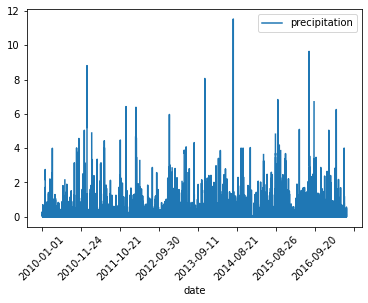

In [80]:
# This is the preceip for ALL the data... lol... I'm going backwards...
oahurain_df.plot(rot = 45)